In [1]:
# pip install -e .. -q

In [2]:
import numpy as np
import scipy as sc
from scipy.stats import dirichlet, gamma, multivariate_normal

In [3]:
from GraphPY.posterior.plotting import plot_clusters_2D, plot_param_posterior_Gaussian2D
from GraphPY.sampler.samplers import GPYSamplerMultivariateGaussian

# Generating data

* Dirichlet-Multinomial approximation to GDP model
* 2-dimensional Gaussian kernell and atom distribution
* Graph 1-2, 1-3, 2-4, 3-4
* 50 observations per node

Note: plots in the notebooks are just inserted images, to get actual plotly figures run the code

In [4]:
# Graph 1-2, 1-3, 2-4, 3-4
# Normal kernel & atom distribution

np.random.seed(10)

L = 10
alpha_0 = 10
eps = 1e-10 * np.ones(L)
dim = 2

mu_phi = np.array([1, -1])
cov_phi = 10 * (np.identity(dim) - np.array([[0, 0.3], [0.3, 0]]))
cov_x = np.identity(dim) + np.array([[0, 0.3], [0.3, 0]])

n_1 = 50
n_2 = 50
n_3 = 50
n_4 = 50

#--------------------------------------------

alpha_1 = gamma.rvs(alpha_0, 1)
alpha_2 = gamma.rvs(alpha_1, 1)
alpha_3 = gamma.rvs(alpha_1, 1)
alpha_4 = gamma.rvs(alpha_2 + alpha_3, 1)

beta_1 = dirichlet.rvs(alpha_1 * np.ones(L)/L)[0] + eps
beta_2 = dirichlet.rvs(alpha_2 * beta_1)[0] + eps
beta_3 = dirichlet.rvs(alpha_3 * beta_1)[0] + eps

pi = sc.stats.beta.rvs(alpha_2, alpha_3)

beta_4 = dirichlet.rvs(alpha_4 * (pi * beta_2 + (1 - pi) * beta_3))[0] + eps

phi = multivariate_normal.rvs(mean=mu_phi, cov=cov_phi, size=L)
# phi = np.array([
#     [5, 0],
#     [0, 5],
#     [0, 0],
#     [-2, 0],
#     [-2, -3],
# ])

#--------------------------------------------

z_1 = np.random.choice(a=np.arange(L), size=n_1, p=beta_1)
z_2 = np.random.choice(a=np.arange(L), size=n_2, p=beta_2)
z_3 = np.random.choice(a=np.arange(L), size=n_3, p=beta_3)
z_4 = np.random.choice(a=np.arange(L), size=n_4, p=beta_4)



x_1 = np.array([multivariate_normal.rvs(mean=phi[z_1][i], cov=cov_x) for i in range(n_1)])
x_2 = np.array([multivariate_normal.rvs(mean=phi[z_2][i], cov=cov_x) for i in range(n_2)])
x_3 = np.array([multivariate_normal.rvs(mean=phi[z_3][i], cov=cov_x) for i in range(n_3)])
x_4 = np.array([multivariate_normal.rvs(mean=phi[z_4][i], cov=cov_x) for i in range(n_4)])

x = {'1': x_1, '2': x_2, '3': x_3, '4': x_4}

In [5]:
# Describing the graph

nodes = {
    '1': {
        'lvl': 0,
        'desc': ['2', '3', '4'],
        'par': [],
    },
    '2': {
        'lvl': 1,
        'desc': ['4'],
        'par': ['1'],
    },
    '3': {
        'lvl': 1,
        'desc': ['4'],
        'par': ['1'],
    },
    '4': {
        'lvl': 2,
        'desc': [],
        'par': ['2', '3'],
    },
}

# Running MCMC sampler

In [9]:
res = GPYSamplerMultivariateGaussian(nodes, x, n_iter=300)

Processing: 100%|███████████████████████████| 300/300 [02:07<00:00,  2.36iter/s]


In [12]:
plot_clusters_2D(nodes, x, res, figsize=(900, 900), grid_mode=True);

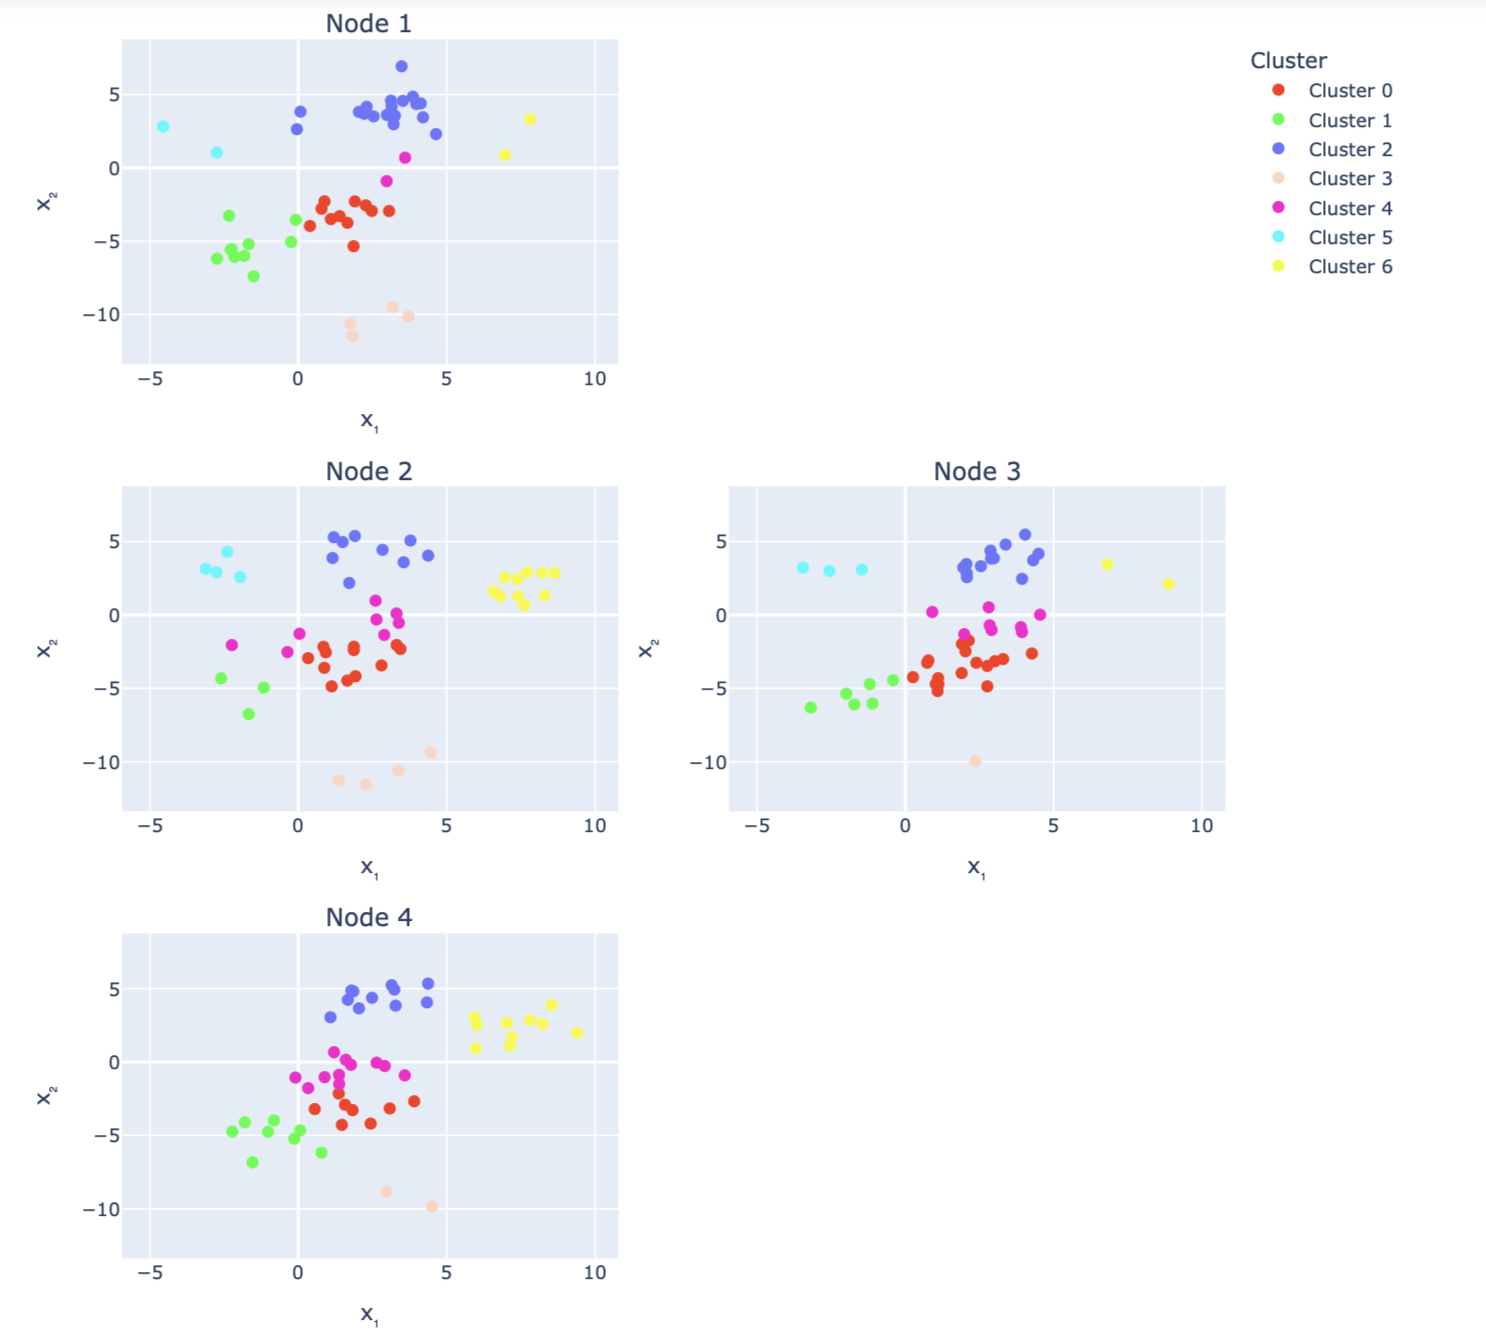

In [14]:
true_values = {'Sigma_x': cov_x, 'Sigma_phi': cov_phi, 'mu_phi': mu_phi}
plot_param_posterior_Gaussian2D(res=res, true_values=true_values);

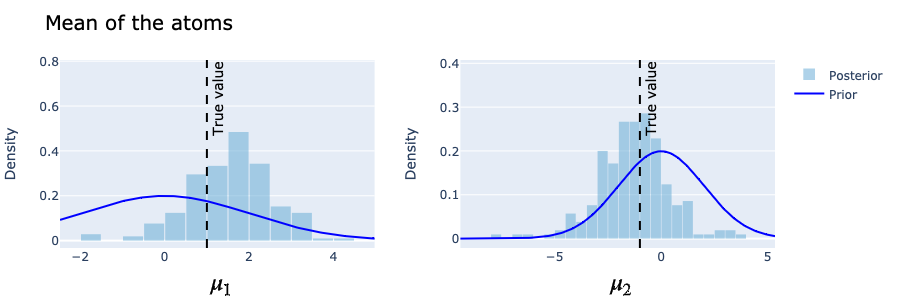
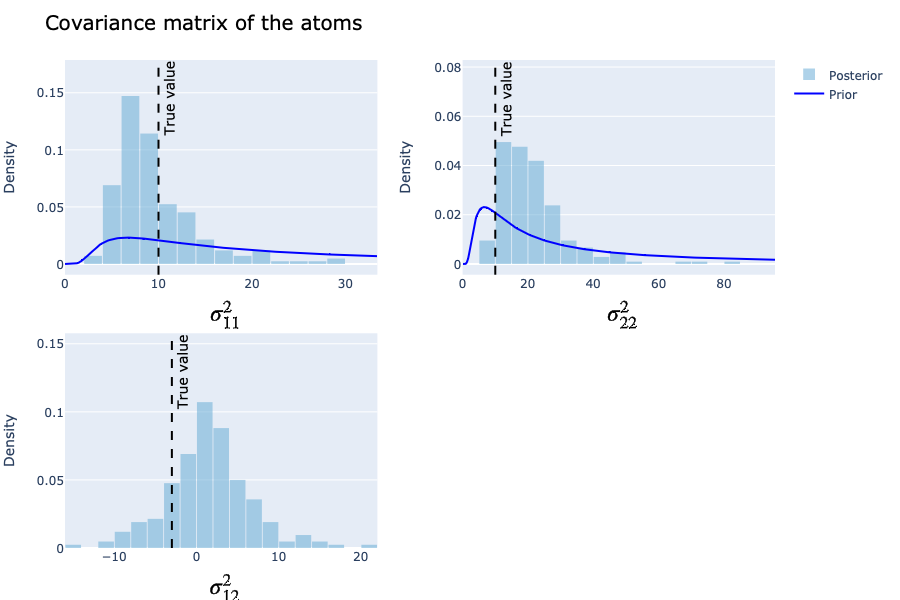
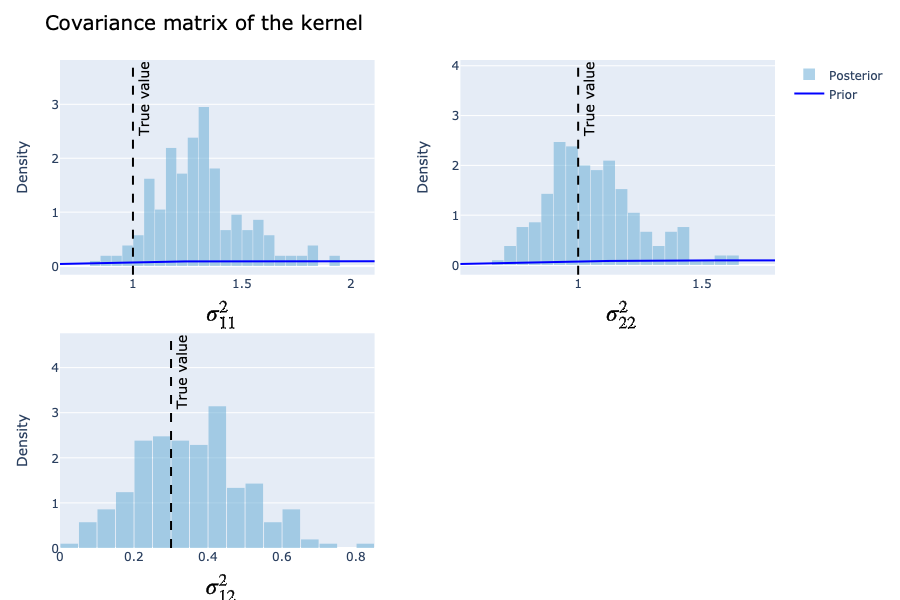